In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\AIE SEM3\ML\Project\dataset1_cleaned.csv")
df = df[:1696]
df = df.set_index("date")
df.head()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
-2.113703,-0.714159,-0.352590,-0.349002,-0.355414,-0.349841,-0.292758,-0.429448,-0.714159,-0.714159
-2.111564,-0.714159,-0.353094,-0.342611,-0.354254,-0.343920,-0.292758,-0.429772,-0.714159,-0.714159
-2.109424,-0.714159,-0.347490,-0.342922,-0.354224,-0.347095,-0.292758,-0.426081,-0.714159,-0.714159
-2.107284,-0.714159,-0.350421,-0.346831,-0.370293,-0.359712,-0.292758,-0.427984,-0.714159,-0.714159
-2.105144,-0.714159,-0.363681,-0.354766,-0.379717,-0.366465,-0.292758,-0.436660,-0.714159,-0.714159


In [3]:
df.shape

(1696, 9)

In [4]:
df.isnull().sum()

symbol     0
open       0
high       0
low        0
close      0
volume     0
market     0
name       0
ranknow    0
dtype: int64

In [5]:
df.describe()

,symbol,open,high,low,close,volume,market,name,ranknow
count,1.696000e+03,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1.696000e+03,1.696000e+03
mean,-7.141594e-01,0.194411,0.190850,0.196558,0.192105,0.040481,0.102487,-7.141594e-01,-7.141594e-01
std,2.221101e-16,1.181358,1.183092,1.180306,1.182497,1.186950,1.172296,2.221101e-16,2.221101e-16
min,-7.141594e-01,-0.391749,-0.383108,-0.396042,-0.387549,-0.292758,-0.454418,-7.141594e-01,-7.141594e-01
25%,-7.141594e-01,-0.275276,-0.272207,-0.275658,-0.273192,-0.280710,-0.348989,-7.141594e-01,-7.141594e-01
50%,-7.141594e-01,-0.163249,-0.166051,-0.161990,-0.163897,-0.262144,-0.250854,-7.141594e-01,-7.141594e-01
75%,-7.141594e-01,0.025351,0.020628,0.033010,0.020809,-0.210238,-0.091247,-7.141594e-01,-7.141594e-01
max,-7.141594e-01,10.985031,10.730697,11.144127,10.750058,16.028611,10.809625,-7.141594e-01,-7.141594e-01


## Visualisation

array([[<AxesSubplot: title={'center': 'symbol'}>,
        <AxesSubplot: title={'center': 'open'}>,
        <AxesSubplot: title={'center': 'high'}>],
       [<AxesSubplot: title={'center': 'low'}>,
        <AxesSubplot: title={'center': 'close'}>,
        <AxesSubplot: title={'center': 'volume'}>],
       [<AxesSubplot: title={'center': 'market'}>,
        <AxesSubplot: title={'center': 'name'}>,
        <AxesSubplot: title={'center': 'ranknow'}>]], dtype=object)

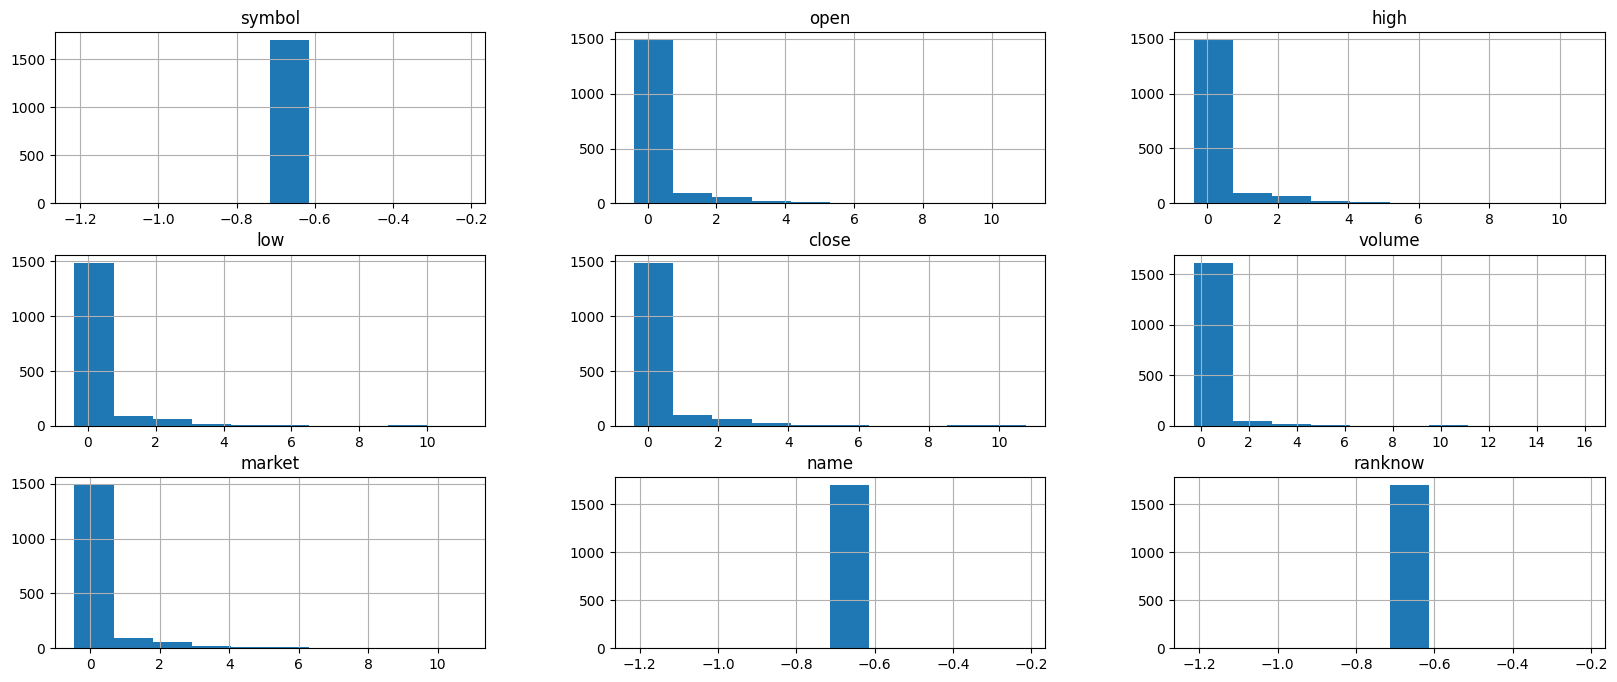

In [6]:
df.hist(figsize=(20, 8))

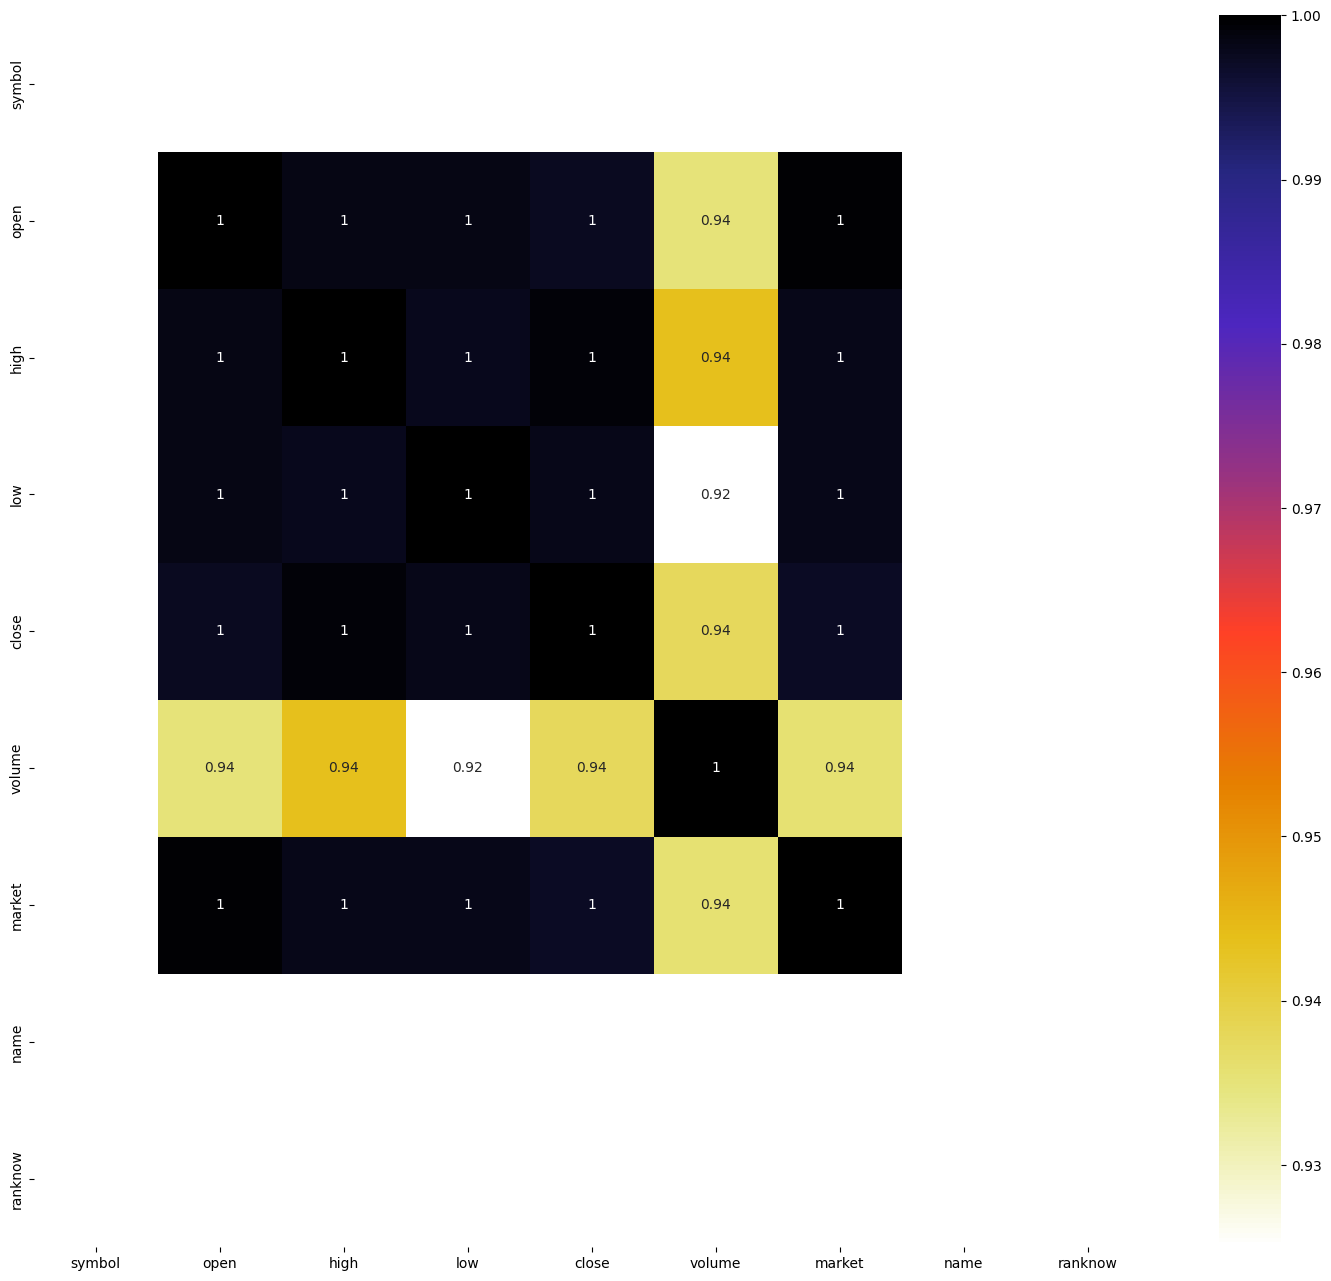

In [7]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

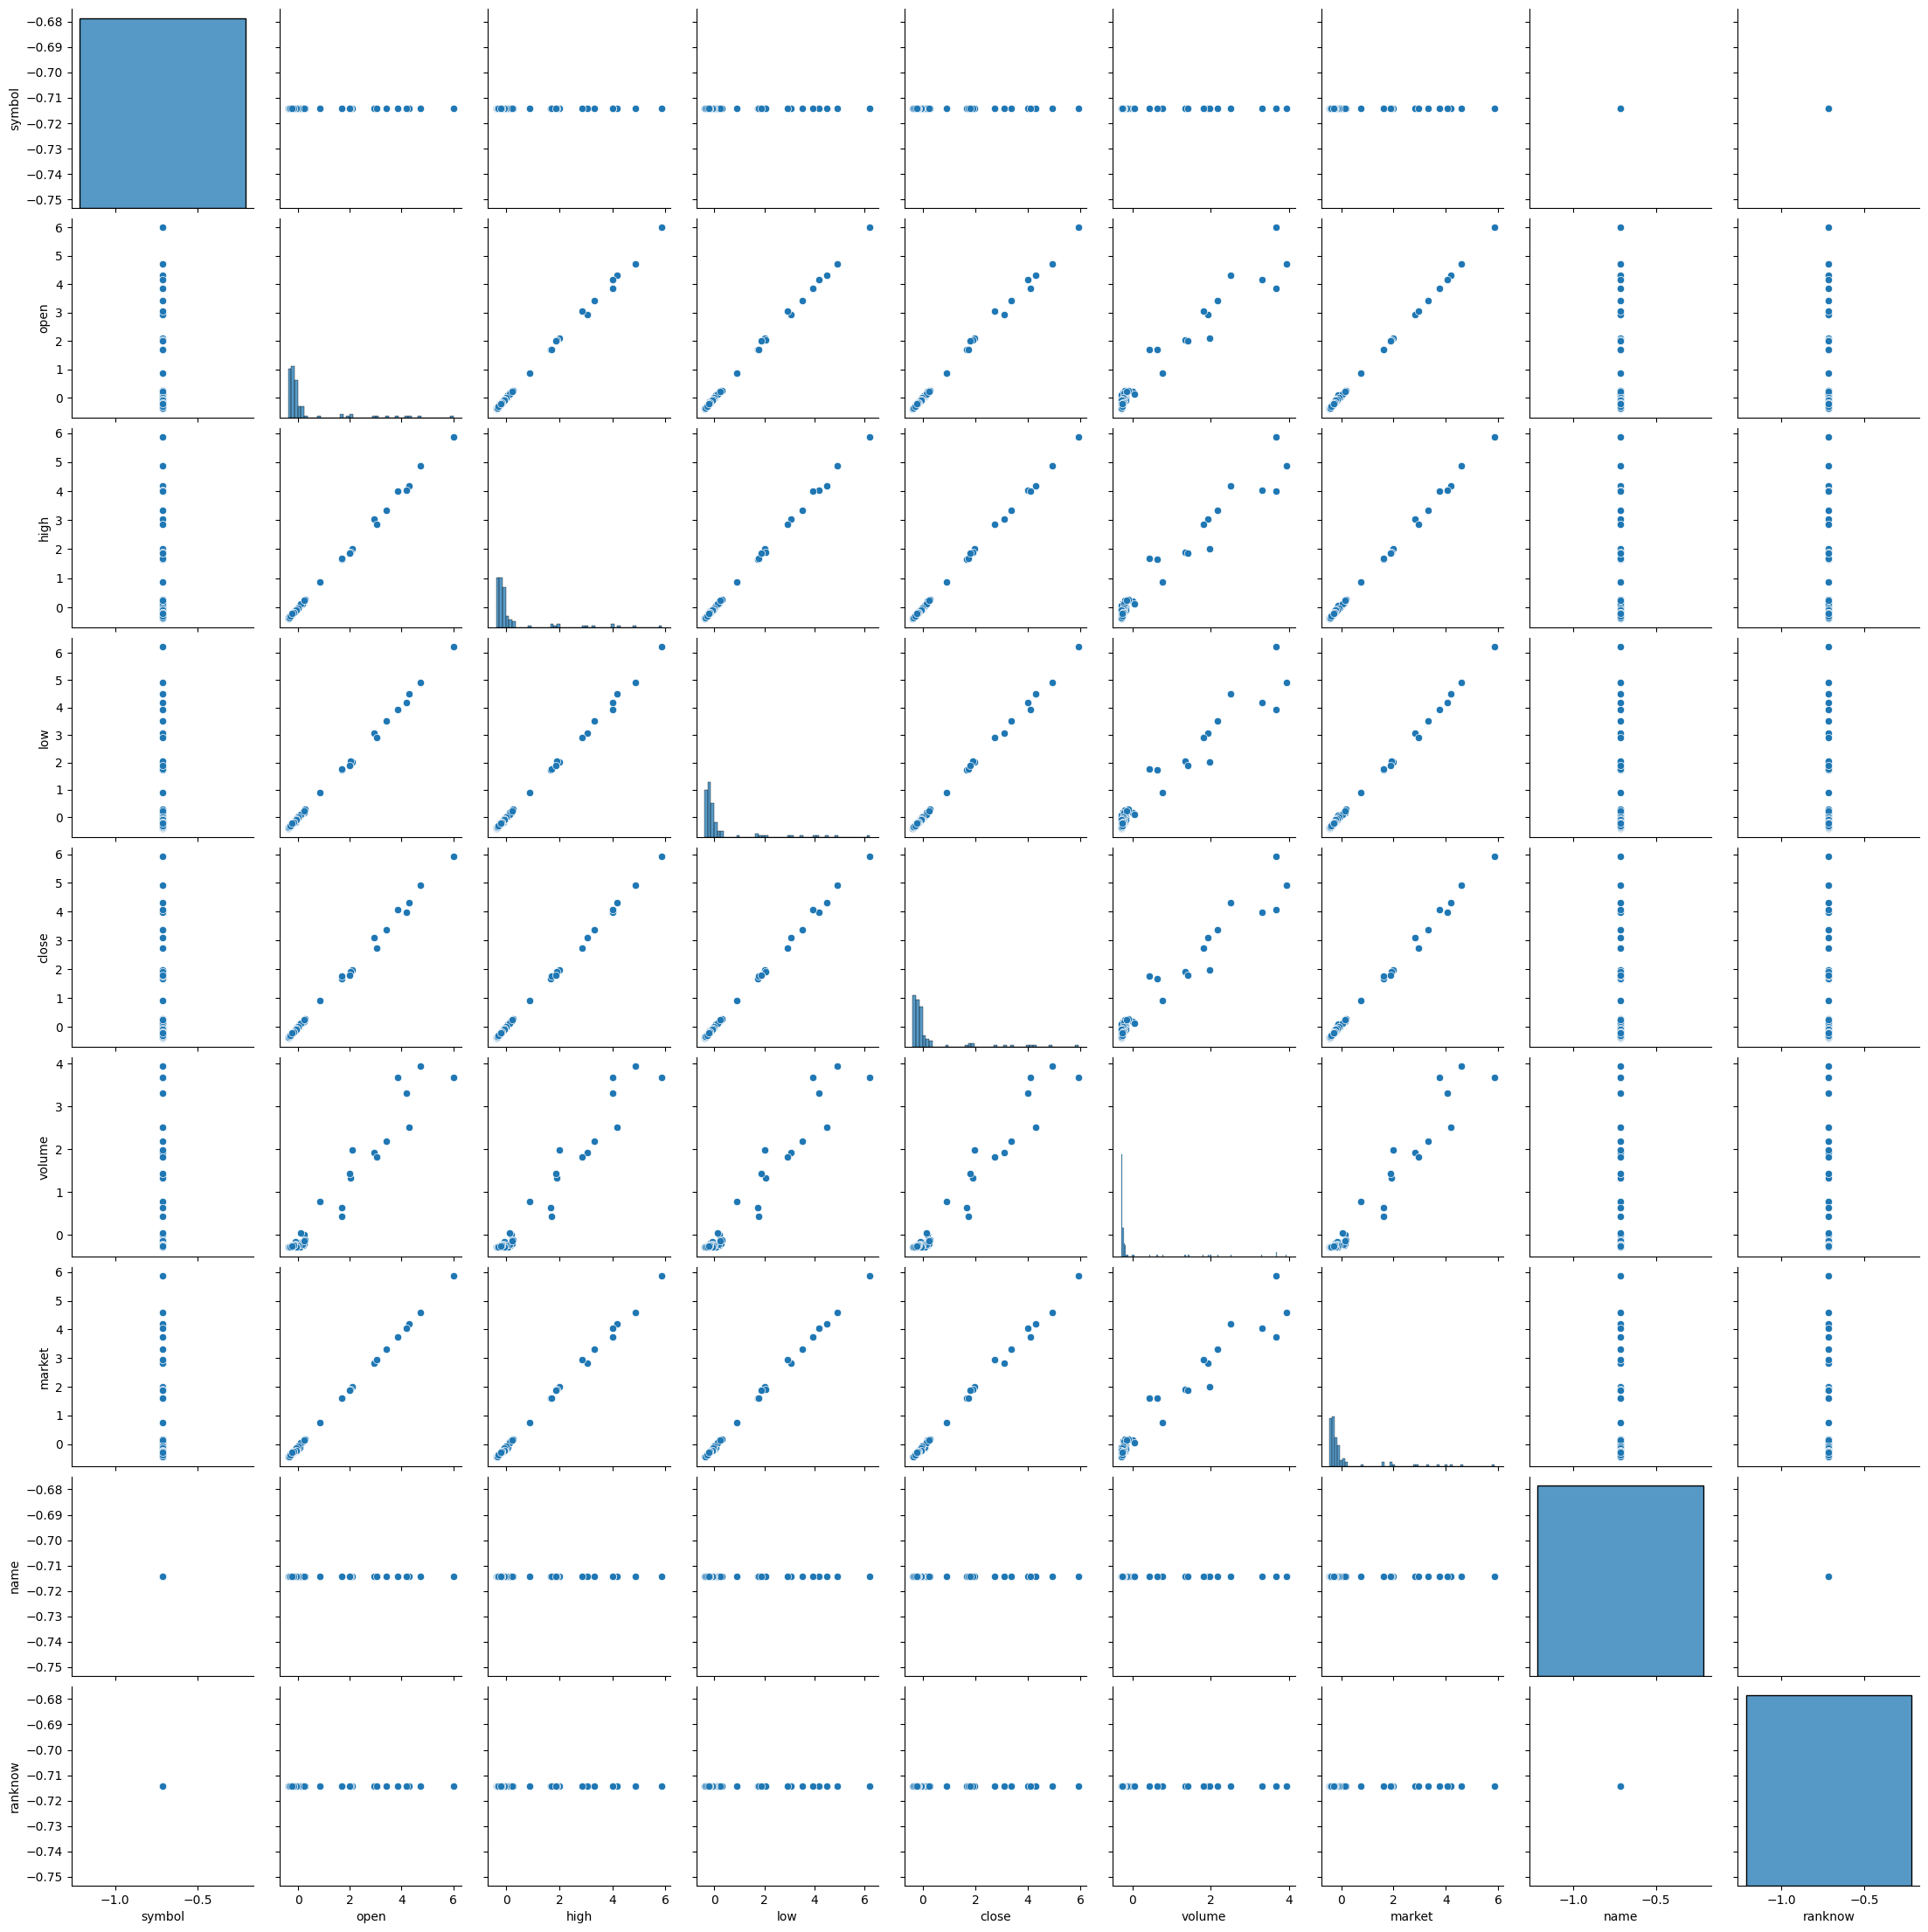

In [8]:
sns.pairplot(df.sample(n=100))

## Data preprocessing

BTC

In [9]:
X = df.drop(columns = ['close'], axis = 1)
Y = df['close']

In [10]:
Y.head()

date
-2.113703   -0.349841
-2.111564   -0.343920
-2.109424   -0.347095
-2.107284   -0.359712
-2.105144   -0.366465
Name: close, dtype: float64

In [11]:
X.head()

,symbol,open,high,low,volume,market,name,ranknow
date,,,,,,,,
-2.113703,-0.714159,-0.352590,-0.349002,-0.355414,-0.292758,-0.429448,-0.714159,-0.714159
-2.111564,-0.714159,-0.353094,-0.342611,-0.354254,-0.292758,-0.429772,-0.714159,-0.714159
-2.109424,-0.714159,-0.347490,-0.342922,-0.354224,-0.292758,-0.426081,-0.714159,-0.714159
-2.107284,-0.714159,-0.350421,-0.346831,-0.370293,-0.292758,-0.427984,-0.714159,-0.714159
-2.105144,-0.714159,-0.363681,-0.354766,-0.379717,-0.292758,-0.436660,-0.714159,-0.714159


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.80, test_size = 0.20, random_state=42)

In [13]:
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


x_train shape: (1356, 8)
x_test shape: (340, 8)
Y_train shape: (1356,)
Y_test shape: (340,)


In [14]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
Xtrain = fs.fit_transform(X_train, Y_train)
Xtest = fs.transform(X_test)
cols = fs.get_support(indices=True)

cols = [X.columns[i] for i in cols]
Xtrain = pd.DataFrame(Xtrain, columns=cols)
Xtest = pd.DataFrame(Xtest, columns=cols)


c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [15]:
Xtrain.head()

,symbol,high,name,ranknow
0,-0.714159,-0.259162,-0.714159,-0.714159
1,-0.714159,-0.153490,-0.714159,-0.714159
2,-0.714159,-0.097361,-0.714159,-0.714159
3,-0.714159,-0.185864,-0.714159,-0.714159
4,-0.714159,-0.304162,-0.714159,-0.714159


In [16]:
# Standardisation
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
st_Xtrain = standard_scalar.fit_transform(Xtrain)
st_Xtest = standard_scalar.transform(Xtest)
st_X_train = pd.DataFrame(st_Xtrain, columns=cols)
st_X_test = pd.DataFrame(st_Xtest, columns=cols)
st_X_train.head()

,symbol,high,name,ranknow
0,-1.110223e-16,-0.395886,-1.110223e-16,-1.110223e-16
1,-1.110223e-16,-0.302387,-1.110223e-16,-1.110223e-16
2,-1.110223e-16,-0.252724,-1.110223e-16,-1.110223e-16
3,-1.110223e-16,-0.331031,-1.110223e-16,-1.110223e-16
4,-1.110223e-16,-0.435704,-1.110223e-16,-1.110223e-16


In [17]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xtrain = pd.DataFrame(Xtrain, columns=cols)
Xtest = pd.DataFrame(Xtest, columns=cols)

In [18]:
Xtrain.head()

,symbol,high,name,ranknow
0,0.0,0.010968,0.0,0.0
1,0.0,0.020478,0.0,0.0
2,0.0,0.025529,0.0,0.0
3,0.0,0.017564,0.0,0.0
4,0.0,0.006918,0.0,0.0


## Modelling

In [19]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

0.9977052706519464
0.9976016391896688
0.9971490534773262
0.9960199040497663
0.9945449778678138
0.9927385779240256
0.9906102662533446
0.9881665683781169
0.9854120029201813


c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.871e-01, tolerance: 1.747e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.696e-01, tolerance: 1.747e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

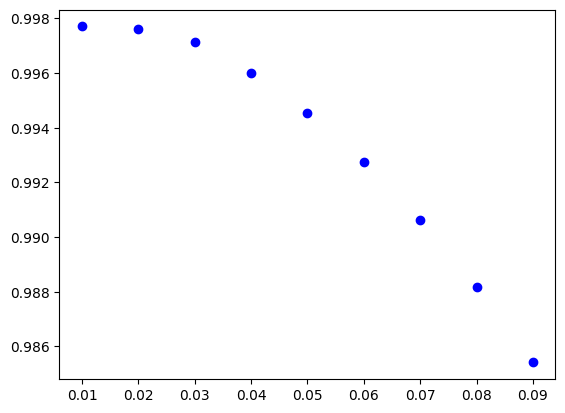

In [20]:
import matplotlib as plt1
import seaborn as sns

for i in np.arange(0.01,0.1, 0.01):
    model=Lasso(alpha=i)
    model.fit(X_train,Y_train)
    print(model.score(X_test,Y_test))
    
    plt1.pyplot.scatter(i,model.score(X_test,Y_test), label='ynew1', color='blue')

### Best parameter for alpha = 0.01

In [21]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.871e-01, tolerance: 1.747e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

## Evaluation

In [25]:
from sklearn import metrics 
from sklearn.metrics import r2_score

In [26]:
print("-"*10, "Accuracy", "-"*10)
Y_pred_lasso = lasso.predict(X_test)
r2lasso = r2_score(Y_test, Y_pred_lasso)
mse_lasso = metrics.mean_squared_error(Y_test, Y_pred_lasso)
print("R2 score of Lasso regression: ", r2lasso)
print("MSE of Lasso regression: ", mse_lasso)

Y_pred_lr = lr.predict(X_test)
r2lr = r2_score(Y_test, Y_pred_lr)
mse_lr = metrics.mean_squared_error(Y_test, Y_pred_lr)
print("Linear regression: ", r2lr)
print("MSE of Lasso regression: ", mse_lr)


Y_pred_rf = rf.predict(X_test)
r2rf = r2_score(Y_test, Y_pred_rf)
mse_rf = metrics.mean_squared_error(Y_test, Y_pred_rf)
print("Random forest regression: ", r2rf)
print("MSE of Lasso regression: ", mse_rf)


Y_pred_est = est.predict(X_test)
r2est = r2_score(Y_test, Y_pred_est)
mse_est = metrics.mean_squared_error(Y_test, Y_pred_est)
print("gradient boosting regression: ", r2est)
print("MSE of Lasso regression: ", mse_est)


---------- Accuracy ----------
R2 score of Lasso regression:  0.9977052706519464
MSE of Lasso regression:  0.004207826016247565
Linear regression:  0.999024120801572
MSE of Lasso regression:  0.0017894615255359511
Random forest regression:  0.994404445177707
MSE of Lasso regression:  0.010260522085776791
gradient boosting regression:  0.9917680582216759
MSE of Lasso regression:  0.015094842800719882


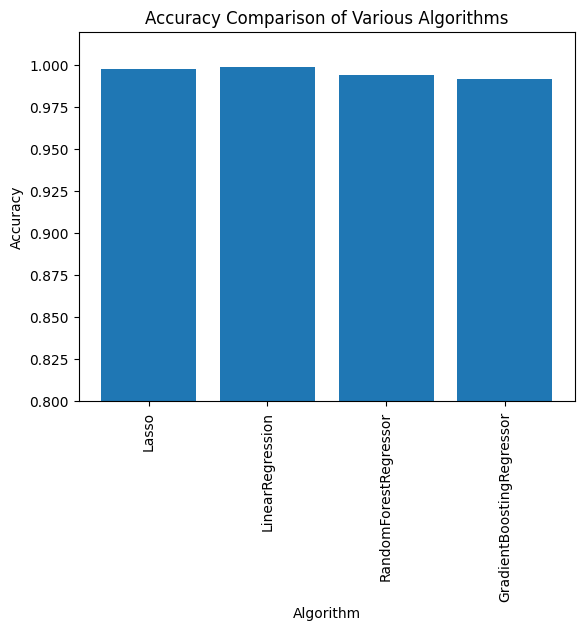

In [27]:
def accuracy_plot(model_list, X, Y):
    scores = []
    algorithms = []
    for model in model_list:
        scores.append(model.score(X,Y))
        name = model.__class__.__name__
        algorithms.append(name)
        
    plt.bar(algorithms, scores)
    plt.ylim([0.8, 1.02,])
    plt.xticks(rotation=90)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Various Algorithms')
    # display the plot
    plt.show()
    
    
models = [lasso, lr, rf, est]  
accuracy_plot(models, X_test, Y_test)

ETH

In [28]:
df1 = pd.read_csv("C:\AIE SEM3\ML\Project\dataset1_cleaned.csv")
df1 = df1[1696:]
df1 = df1.set_index("date")
df1.head()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
-0.335592,1.400248,-0.430245,-0.422544,-0.434498,-0.425189,-0.292631,-0.481396,1.400248,1.400248
-0.333452,1.400248,-0.430269,-0.422955,-0.435600,-0.426345,-0.292238,-0.475583,1.400248,1.400248
-0.331312,1.400248,-0.431490,-0.424022,-0.435652,-0.426374,-0.292347,-0.479920,1.400248,1.400248
-0.329173,1.400248,-0.431486,-0.424105,-0.435648,-0.426371,-0.292445,-0.479903,1.400248,1.400248
-0.327033,1.400248,-0.431489,-0.423883,-0.435632,-0.426163,-0.291628,-0.479915,1.400248,1.400248


In [29]:
df1.describe()

,symbol,open,high,low,close,volume,market,name,ranknow
count,8.650000e+02,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,8.650000e+02,8.650000e+02
mean,1.400248e+00,-0.381180,-0.374198,-0.385390,-0.376660,-0.079372,-0.200946,1.400248e+00,1.400248e+00
std,2.221731e-16,0.080943,0.080512,0.080925,0.080325,0.436698,0.454982,2.221731e-16,2.221731e-16
min,1.400248e+00,-0.431651,-0.424242,-0.435779,-0.426527,-0.292679,-0.481396,1.400248e+00,1.400248e+00
25%,1.400248e+00,-0.427560,-0.420207,-0.431673,-0.422512,-0.288132,-0.459996,1.400248e+00,1.400248e+00
50%,1.400248e+00,-0.425081,-0.417841,-0.429128,-0.420093,-0.279128,-0.447559,1.400248e+00,1.400248e+00
75%,1.400248e+00,-0.376267,-0.369959,-0.381187,-0.371223,-0.084052,-0.181243,1.400248e+00,1.400248e+00
max,1.400248e+00,-0.008818,0.021904,-0.011111,0.028749,3.707143,1.927412,1.400248e+00,1.400248e+00


array([[<AxesSubplot: title={'center': 'symbol'}>,
        <AxesSubplot: title={'center': 'open'}>,
        <AxesSubplot: title={'center': 'high'}>],
       [<AxesSubplot: title={'center': 'low'}>,
        <AxesSubplot: title={'center': 'close'}>,
        <AxesSubplot: title={'center': 'volume'}>],
       [<AxesSubplot: title={'center': 'market'}>,
        <AxesSubplot: title={'center': 'name'}>,
        <AxesSubplot: title={'center': 'ranknow'}>]], dtype=object)

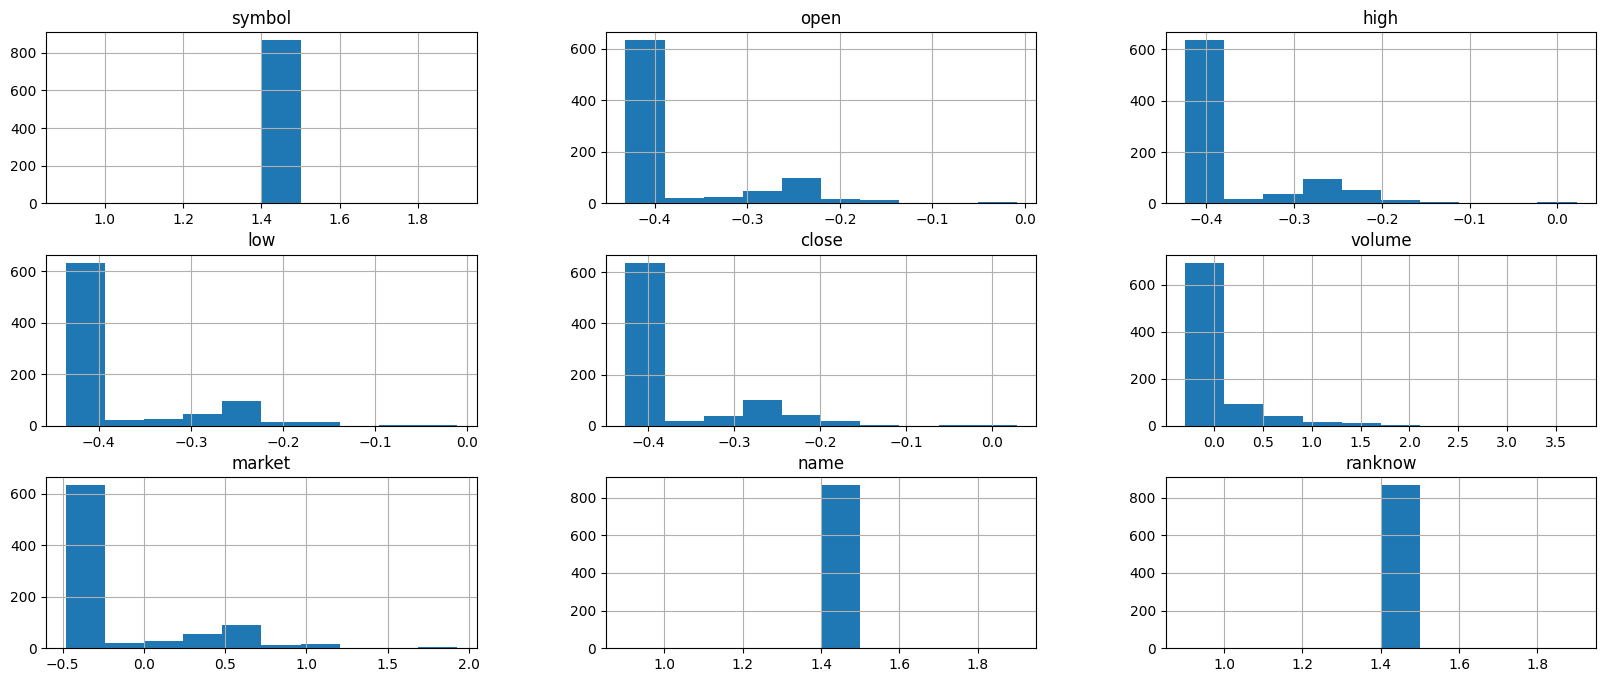

In [30]:
df1.hist(figsize=(20, 8))

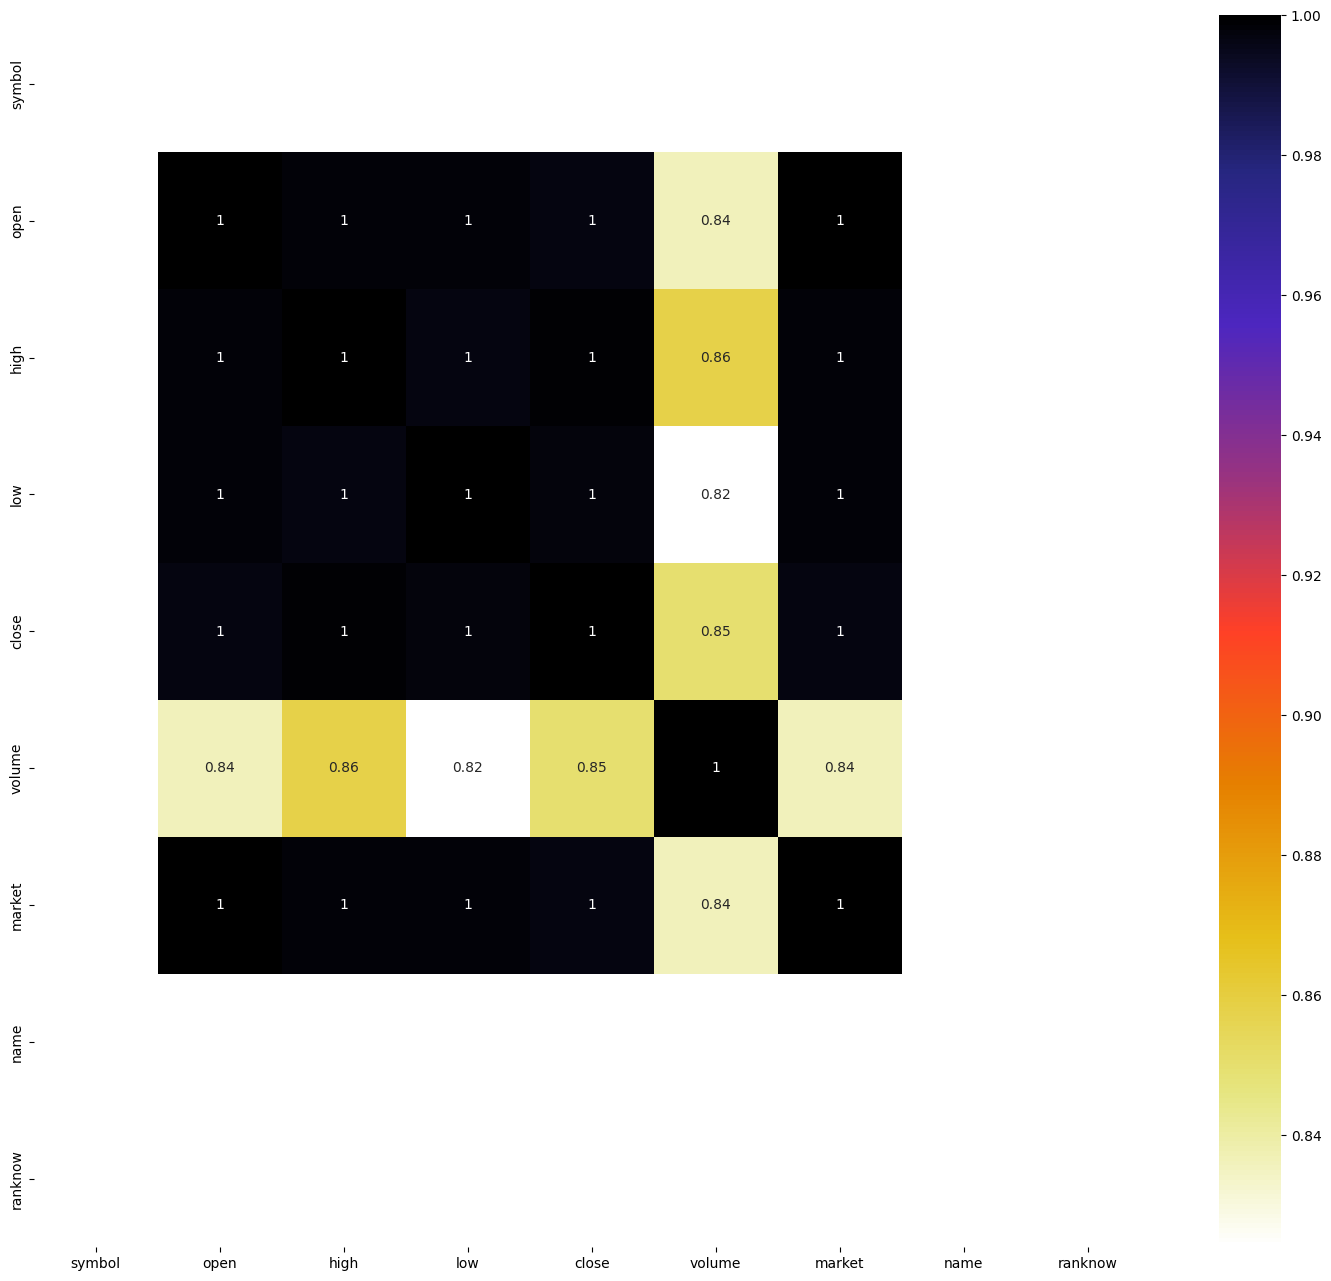

In [31]:
plt.figure(figsize=(18,16))
sns.heatmap(df1.corr(), annot=True, cmap=plt.cm.CMRmap_r);

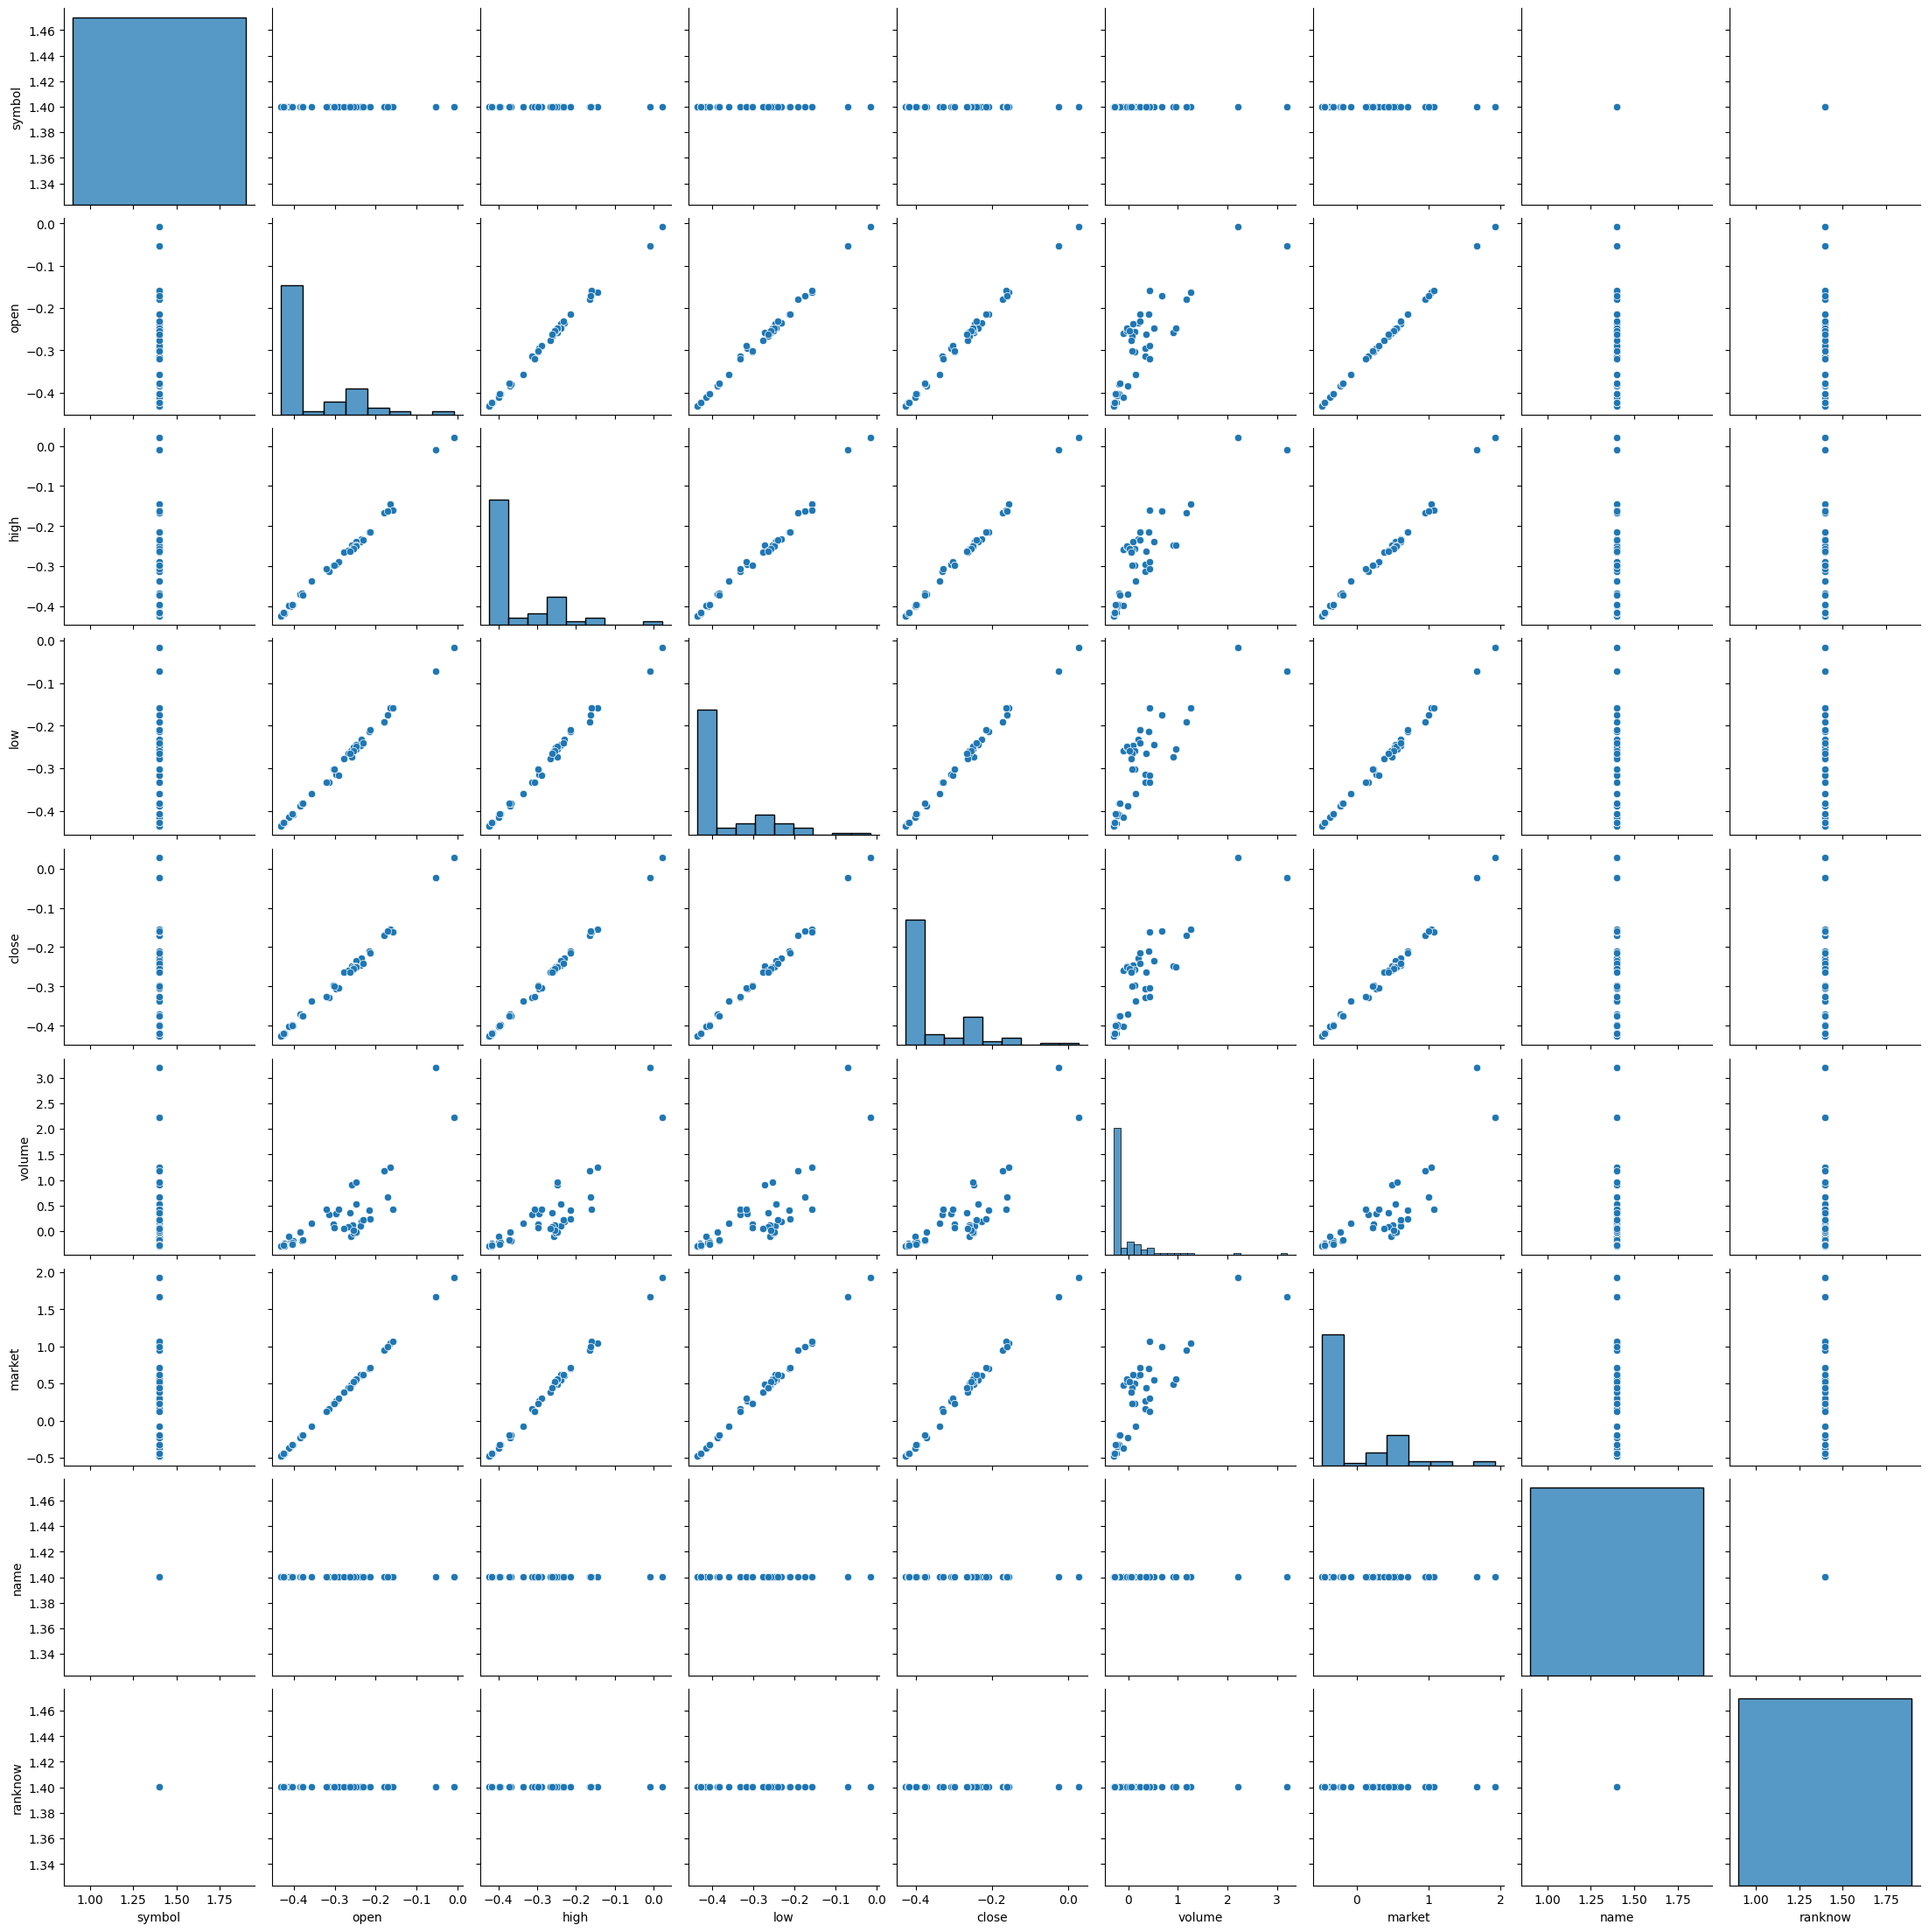

In [32]:
sns.pairplot(df1.sample(n=100))

In [33]:
X = df1.drop(columns = ['close'], axis = 1)
Y = df1['close']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.80, test_size = 0.20, random_state=42)

In [35]:
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


x_train shape: (692, 8)
x_test shape: (173, 8)
Y_train shape: (692,)
Y_test shape: (173,)


In [36]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
Xtrain = fs.fit_transform(X_train, Y_train)
Xtest = fs.transform(X_test)
cols = fs.get_support(indices=True)

cols = [X.columns[i] for i in cols]
Xtrain = pd.DataFrame(Xtrain, columns=cols)
Xtest = pd.DataFrame(Xtest, columns=cols)
Xtrain.head()

c:\Users\kiran\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,symbol,high,name,ranknow
0,1.400248,-0.350346,1.400248,1.400248
1,1.400248,-0.416492,1.400248,1.400248
2,1.400248,-0.399111,1.400248,1.400248
3,1.400248,-0.423255,1.400248,1.400248
4,1.400248,-0.417852,1.400248,1.400248


In [37]:
# Standardisation
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
st_Xtrain = standard_scalar.fit_transform(Xtrain)
st_Xtest = standard_scalar.transform(Xtest)
st_X_train = pd.DataFrame(st_Xtrain, columns=cols)
st_X_test = pd.DataFrame(st_Xtest, columns=cols)
st_X_train.head()

,symbol,high,name,ranknow
0,-2.220446e-16,0.320939,-2.220446e-16,-2.220446e-16
1,-2.220446e-16,-0.510491,-2.220446e-16,-2.220446e-16
2,-2.220446e-16,-0.292025,-2.220446e-16,-2.220446e-16
3,-2.220446e-16,-0.595505,-2.220446e-16,-2.220446e-16
4,-2.220446e-16,-0.527592,-2.220446e-16,-2.220446e-16


In [38]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xtrain = pd.DataFrame(Xtrain, columns=cols)
Xtest = pd.DataFrame(Xtest, columns=cols)

0.9945502808926179
0.9908481729078475
0.9859190911517449
0.9798545347536406
0.972247907108301
0.9630992082157258
0.952408438075915
0.9401755966888689
0.9264006840545871


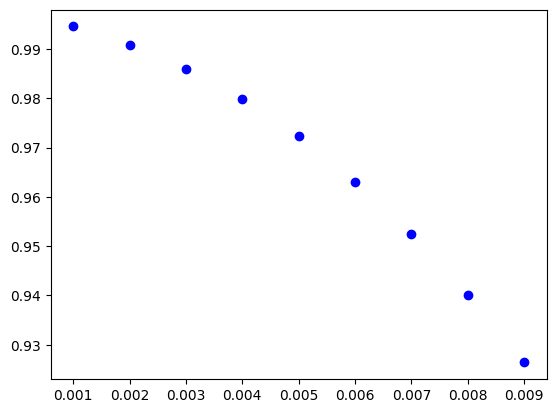

In [39]:
for i in np.arange(0.001,0.01, 0.001):
    model=Lasso(alpha=i)
    model.fit(X_train,Y_train)
    print(model.score(X_test,Y_test))
    
    plt1.pyplot.scatter(i,model.score(X_test,Y_test), label='ynew1', color='blue')

In [40]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [41]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [42]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

In [44]:
print("-"*10, "Accuracy", "-"*10)
Y_pred_lasso = lasso.predict(X_test)
r2lasso = r2_score(Y_test, Y_pred_lasso)
mse_lasso = metrics.mean_squared_error(Y_test, Y_pred_lasso)
print("R2 score of Lasso regression: ", r2lasso)
print("MSE of Lasso regression: ", mse_lasso)

Y_pred_lr = lr.predict(X_test)
r2lr = r2_score(Y_test, Y_pred_lr)
mse_lr = metrics.mean_squared_error(Y_test, Y_pred_lr)
print("Linear regression: ", r2lr)
print("MSE of Lasso regression: ", mse_lr)


Y_pred_rf = rf.predict(X_test)
r2rf = r2_score(Y_test, Y_pred_rf)
mse_rf = metrics.mean_squared_error(Y_test, Y_pred_rf)
print("Random forest regression: ", r2rf)
print("MSE of Lasso regression: ", mse_rf)


Y_pred_est = est.predict(X_test)
r2est = r2_score(Y_test, Y_pred_est)
mse_est = metrics.mean_squared_error(Y_test, Y_pred_est)
print("gradient boosting regression: ", r2est)
print("MSE of Lasso regression: ", mse_est)


---------- Accuracy ----------
R2 score of Lasso regression:  0.9945502808926179
MSE of Lasso regression:  3.7968077719648845e-05
Linear regression:  0.9993793690911281
MSE of Lasso regression:  4.323922411219853e-06
Random forest regression:  0.998577959861583
MSE of Lasso regression:  9.90732355778465e-06
gradient boosting regression:  0.9981015054601017
MSE of Lasso regression:  1.3226771292404233e-05


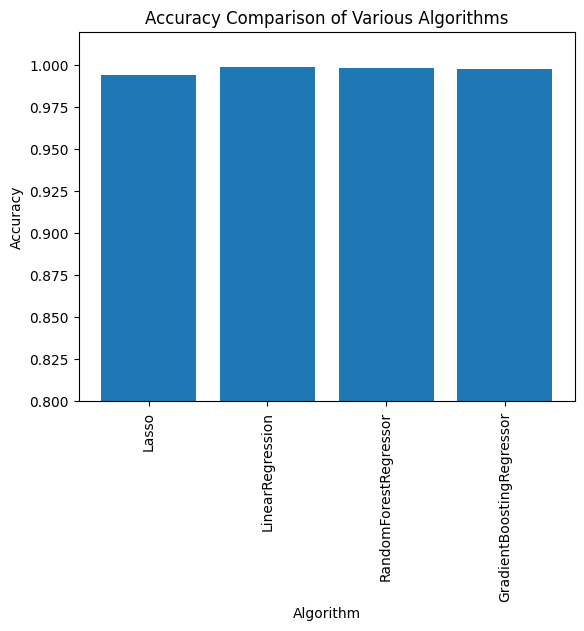

In [46]:
def accuracy_plot(model_list, X, Y):
    scores = []
    algorithms = []
    for model in model_list:
        scores.append(model.score(X,Y))
        name = model.__class__.__name__
        algorithms.append(name)
        
    plt.bar(algorithms, scores)
    plt.ylim([0.8, 1.02,])
    plt.xticks(rotation=90)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Various Algorithms')
    # display the plot
    plt.show()
    
    
models = [lasso, lr, rf, est]  
accuracy_plot(models, X_test, Y_test)